In [60]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

Load the dataset

In [2]:

df =pd.read_csv('C:\\Users\\dell\\Desktop\\projects\\churn\\archive (2)\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

option for display all columns 

In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [7]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [9]:
df[df['TotalCharges']==' ']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


convert the TotalCharges variables from categorical to numerical with handling the error valeus 

In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df[df['TotalCharges']==' ']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

distribution of the TotalCharges variable.

<Axes: >

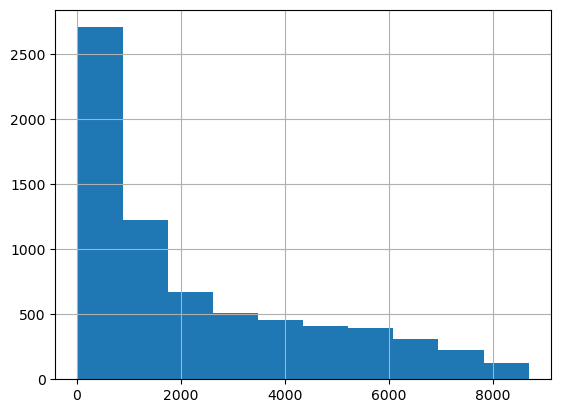

In [13]:
df['TotalCharges'].hist()

handling the missing valeus 

In [14]:
df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].median())

In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.columns= df.columns.str.lower().str.replace(' ', '_')

In [17]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [19]:
df.churn=(df.churn=='Yes').astype(int)

In [20]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [24]:
df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [26]:
df.churn.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn, dtype: float64

In [27]:
df['seniorcitizen']=df['seniorcitizen'].astype('object')

In [28]:
categorical= list(df.select_dtypes(include=['object']).columns)

In [30]:
numerical= list(df.select_dtypes(include=['number']).columns)

In [31]:
numerical

['tenure', 'monthlycharges', 'totalcharges', 'churn']

In [33]:
numerical.remove('churn')

In [35]:
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [41]:
global_mean= df.churn.mean()
print(global_mean)
round(global_mean,2)

0.2653698707936959


0.27

In [43]:
churn_gender=df.groupby('gender').churn.mean()
churn_gender

gender
Female    0.269209
Male      0.261603
Name: churn, dtype: float64

on conclut que la moyenne de female et male sont plus proche que lr global_mean donc on peut dire que cette variable n'a pas effet 

In [45]:
churn_partner=df.groupby('partner').churn.mean()
churn_partner

partner
No     0.329580
Yes    0.196649
Name: churn, dtype: float64

In [46]:
risk_gender= churn_gender/global_mean
risk_gender

gender
Female    1.014466
Male      0.985807
Name: churn, dtype: float64

In [48]:
risk_partner= churn_partner/global_mean
risk_partner 

partner
No     1.241964
Yes    0.741038
Name: churn, dtype: float64

In [55]:

for feature in categorical:
    df_group=df.groupby(by=feature).churn.agg(['mean'])
    df_group['diff']=df_group['mean'] - global_mean
    df_group['risk']=df_group['mean']/global_mean
    display(df_group)

,mean,diff,risk
gender,,,
Female,0.269209,0.003839,1.014466
Male,0.261603,-0.003766,0.985807


,mean,diff,risk
seniorcitizen,,,
0,0.236062,-0.029308,0.889557
1,0.416813,0.151443,1.570686


,mean,diff,risk
partner,,,
No,0.329580,0.064210,1.241964
Yes,0.196649,-0.068721,0.741038


,mean,diff,risk
dependents,,,
No,0.312791,0.047422,1.178700
Yes,0.154502,-0.110868,0.582215


,mean,diff,risk
phoneservice,,,
No,0.249267,-0.016103,0.939319
Yes,0.267096,0.001726,1.006506


,mean,diff,risk
multiplelines,,,
No,0.250442,-0.014927,0.943749
No phone service,0.249267,-0.016103,0.939319
Yes,0.286099,0.020729,1.078114


,mean,diff,risk
internetservice,,,
DSL,0.189591,-0.075779,0.714441
Fiber optic,0.418928,0.153558,1.578656
No,0.074050,-0.191320,0.279044


,mean,diff,risk
onlinesecurity,,,
No,0.417667,0.152297,1.573906
No internet service,0.074050,-0.191320,0.279044
Yes,0.146112,-0.119258,0.550597


,mean,diff,risk
onlinebackup,,,
No,0.399288,0.133918,1.504645
No internet service,0.074050,-0.191320,0.279044
Yes,0.215315,-0.050055,0.811377


,mean,diff,risk
deviceprotection,,,
No,0.391276,0.125906,1.474456
No internet service,0.074050,-0.191320,0.279044
Yes,0.225021,-0.040349,0.847951


,mean,diff,risk
techsupport,,,
No,0.416355,0.150985,1.568960
No internet service,0.074050,-0.191320,0.279044
Yes,0.151663,-0.113706,0.571517


,mean,diff,risk
streamingtv,,,
No,0.335231,0.069861,1.263261
No internet service,0.074050,-0.191320,0.279044
Yes,0.300702,0.035332,1.133143


,mean,diff,risk
streamingmovies,,,
No,0.336804,0.071434,1.269188
No internet service,0.074050,-0.191320,0.279044
Yes,0.299414,0.034044,1.128291


,mean,diff,risk
contract,,,
Month-to-month,0.427097,0.161727,1.609440
One year,0.112695,-0.152675,0.424672
Two year,0.028319,-0.237051,0.106714


,mean,diff,risk
paperlessbilling,,,
No,0.163301,-0.102069,0.615371
Yes,0.335651,0.070281,1.264842


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.167098,-0.098271,0.629681
Credit card (automatic),0.152431,-0.112939,0.574410
Electronic check,0.452854,0.187484,1.706502
Mailed check,0.191067,-0.074303,0.720003


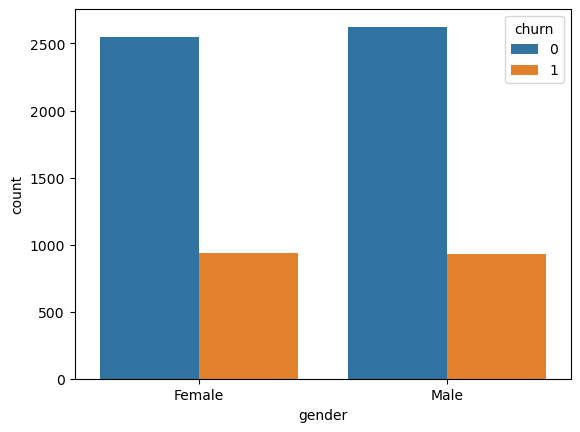

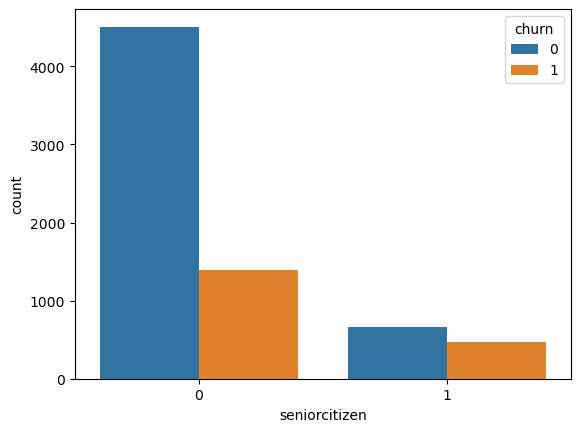

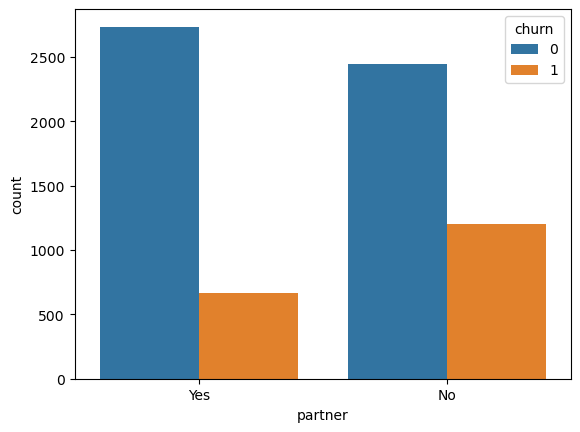

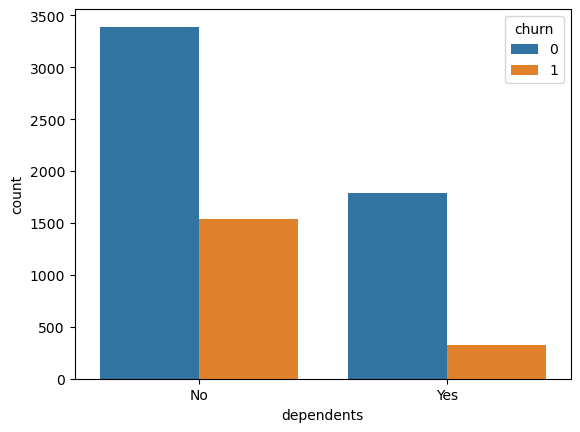

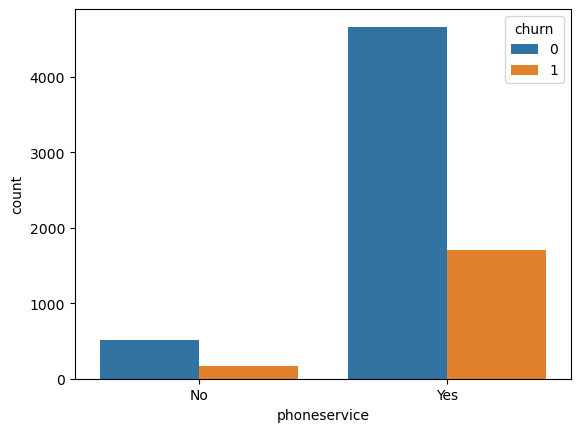

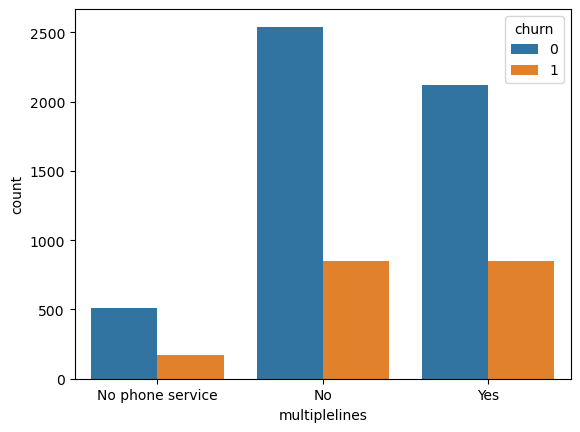

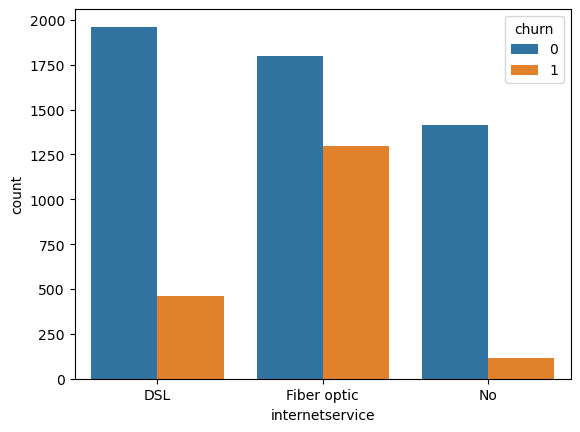

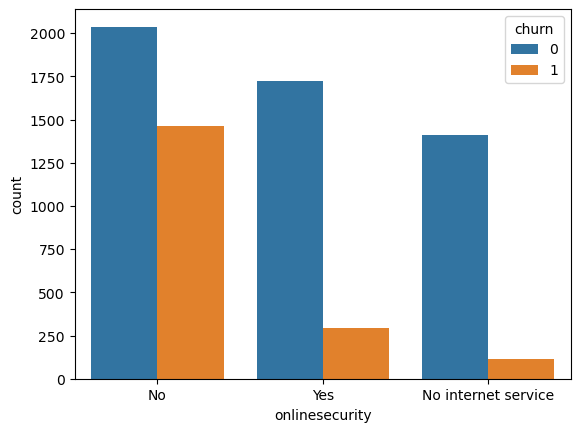

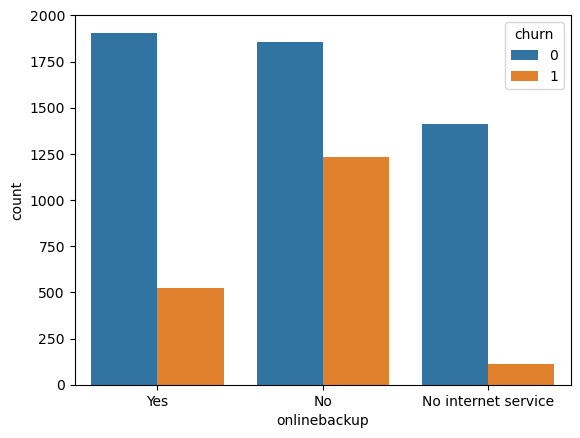

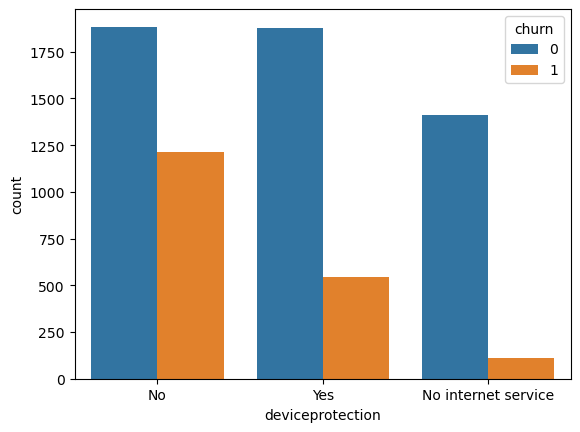

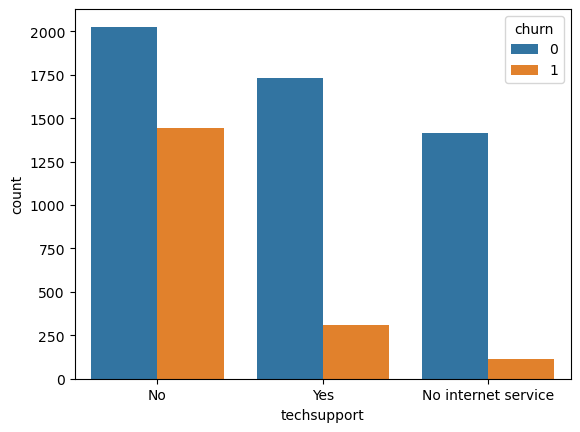

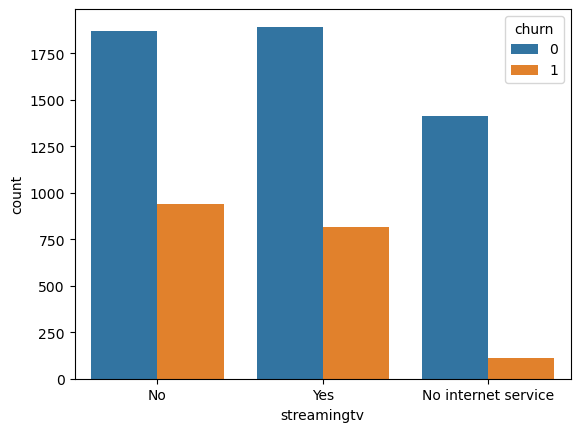

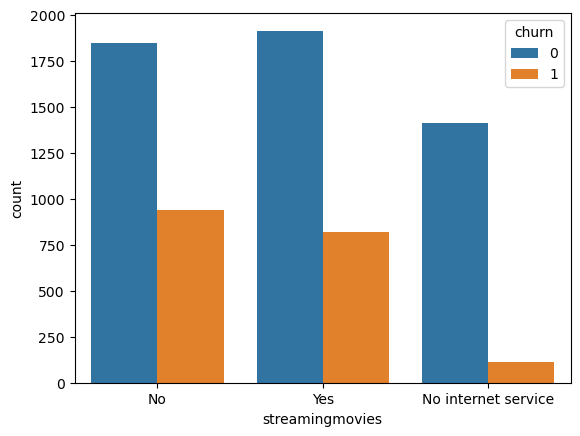

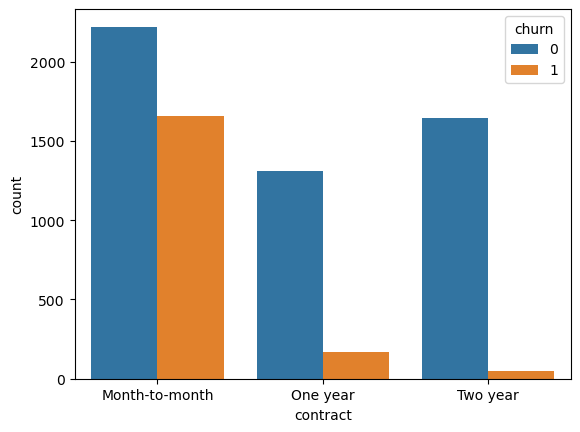

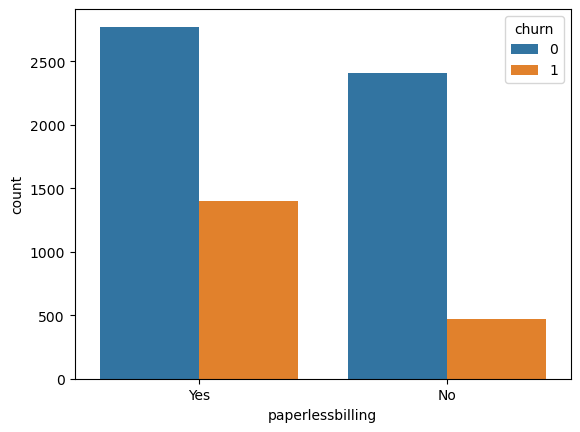

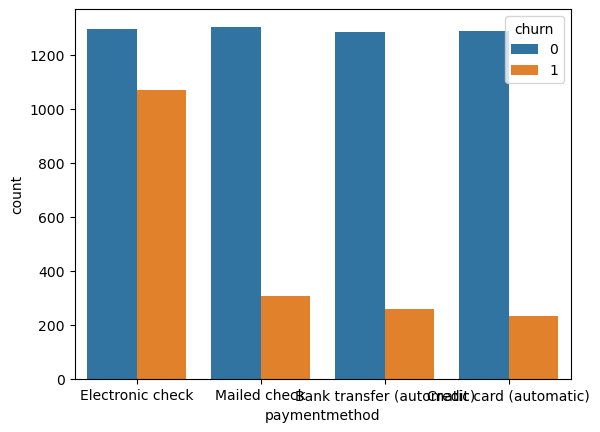

In [61]:
for feature in categorical:
    _=sns.countplot(x=feature , hue='churn', data=df)
    plt.show()

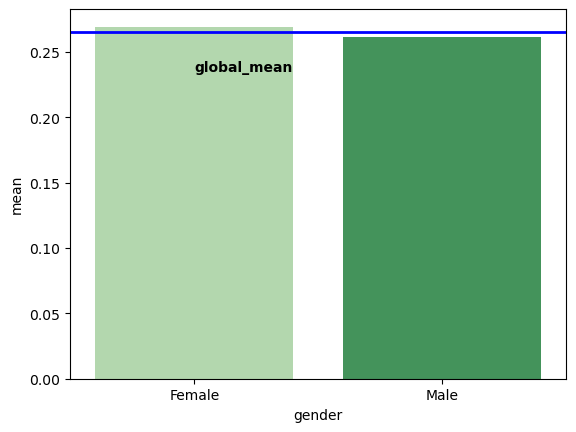

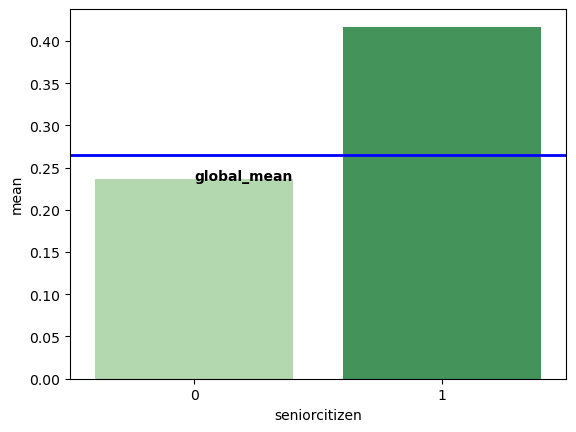

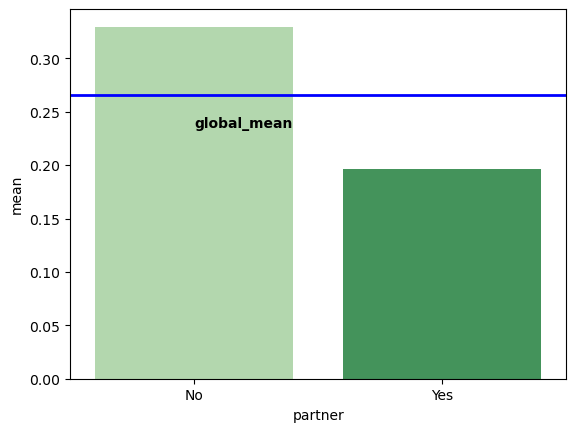

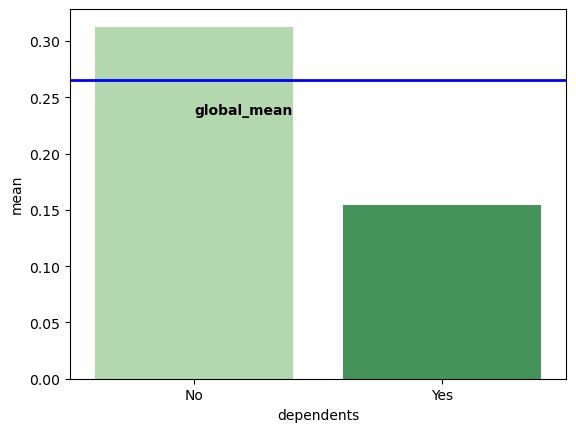

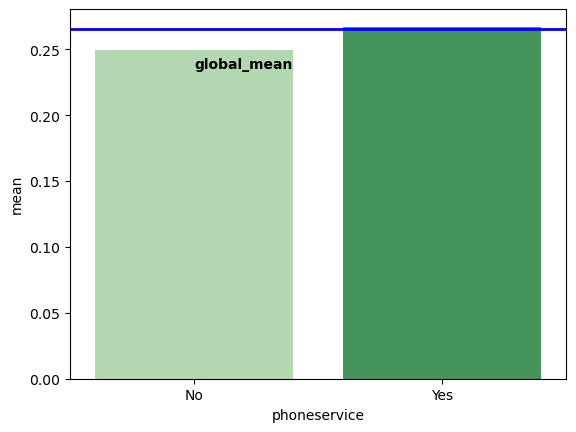

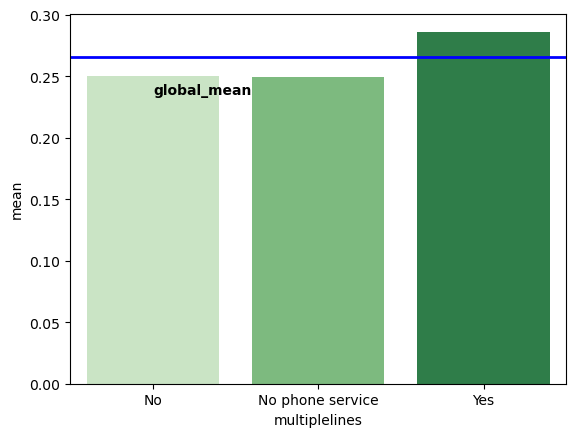

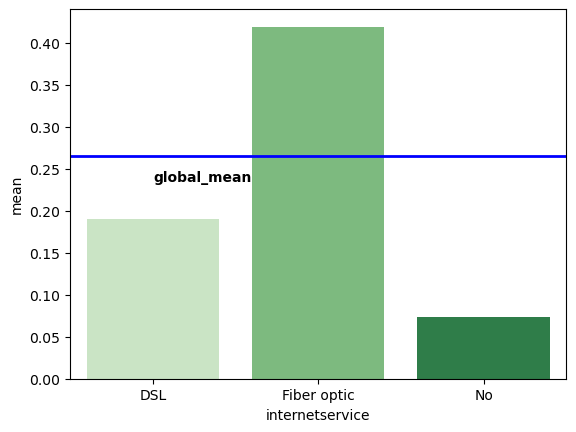

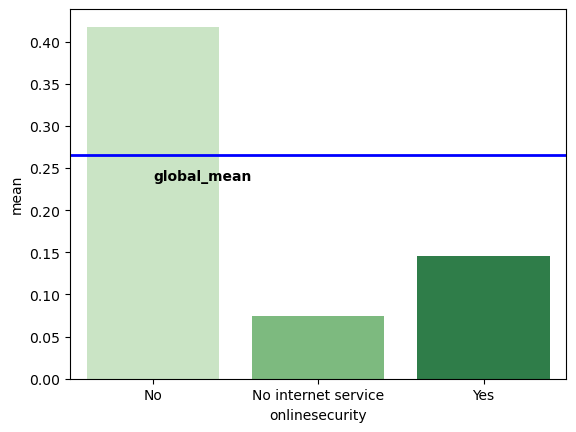

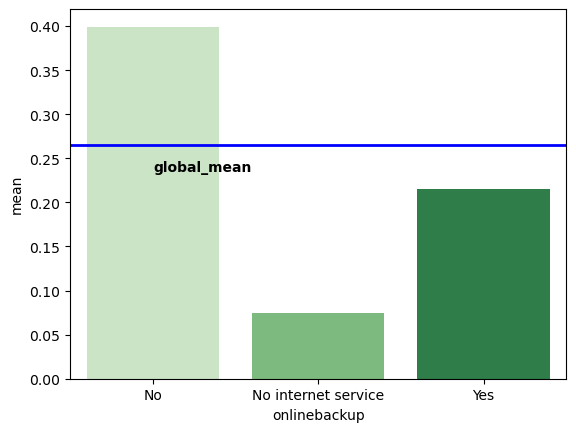

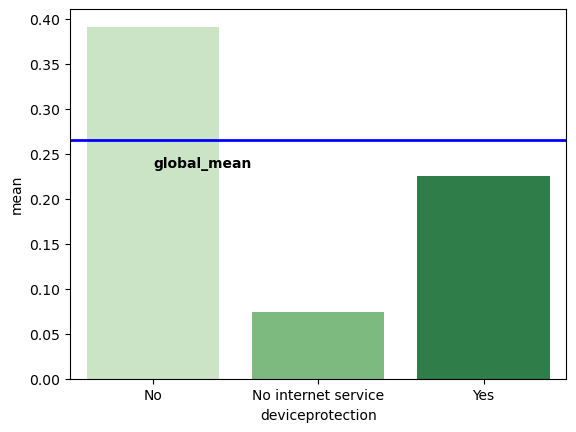

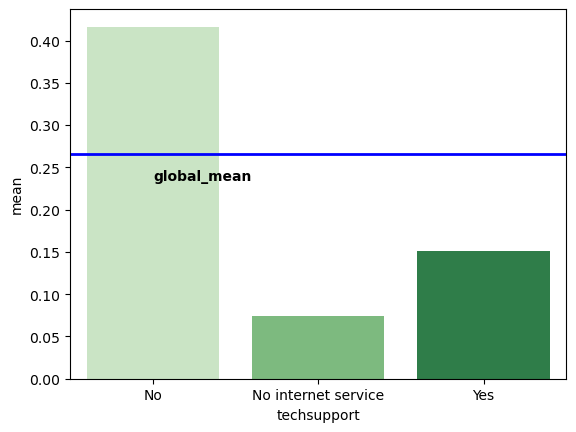

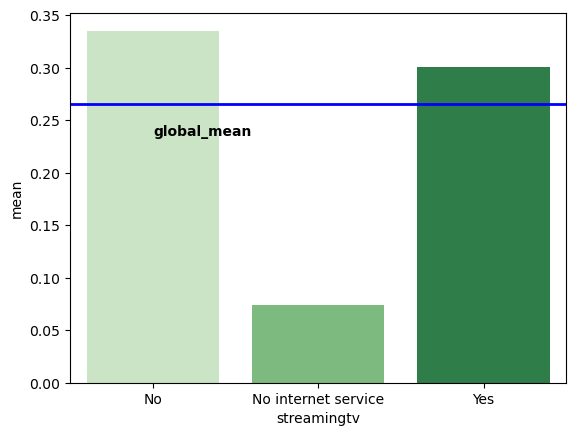

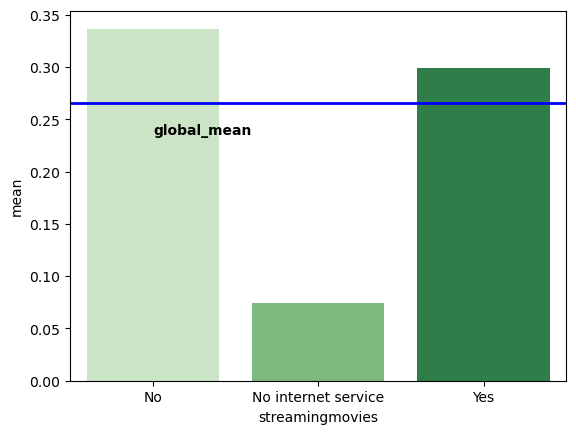

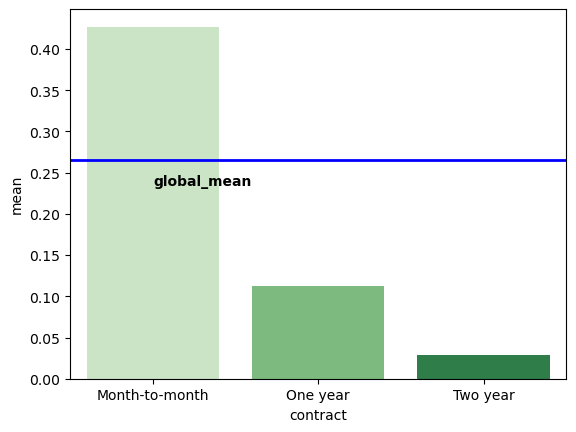

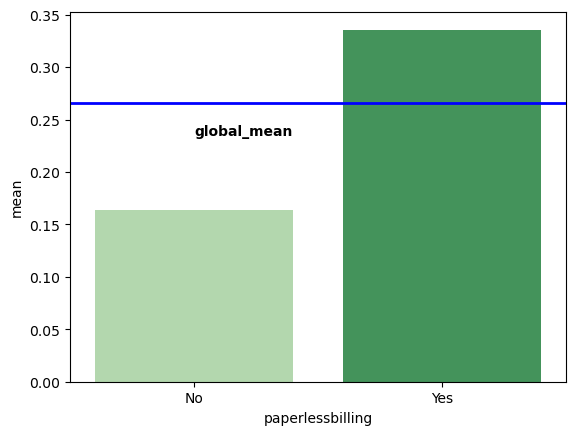

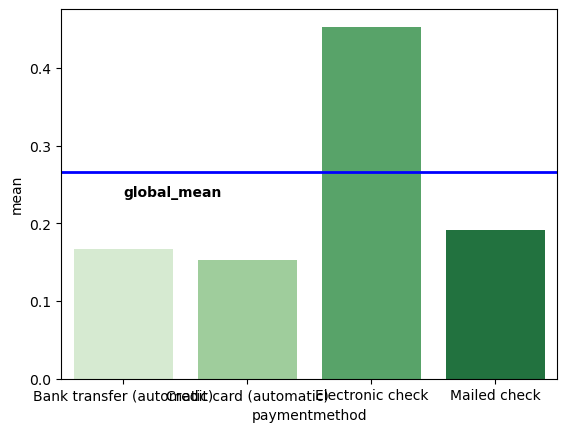

In [65]:
for feature in categorical:
    df_group=df.groupby(by=feature).churn.agg(['mean']).reset_index()
    graph=sns.barplot(x=feature,y='mean' , data=df_group, palette='Greens')
    graph.axhline(global_mean, linewidth=2, color='b' )
    plt.text(0,global_mean-0.03,'global_mean', color='black', weight="semibold")
    plt.show()